# Get the imports

In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.layers import Conv2D, Dropout, Dense, BatchNormalization, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf
from PIL import Image
import cv2

# Load the train dataset

In [2]:
classic=[]
country=[]
disco=[]
hiphop=[]
metal=[]
reggae=[]
rock=[] 
blues=[]
pop=[]
r_size=(64,64)
for i in range(2000):
    num= random.randint(0,2999)
    x=Image.open("C:\Work\Datasets\Mel spectros\Classical\classical"+str(num)+".png")
    x=cv2.resize(np.array(x).astype(np.float32), r_size)
    classic.append([x, 'classic'])
for i in range(2000):
    num= random.randint(0,2999)
    x=mpimg.imread("C:\Work\Datasets\Mel spectros\Country\country"+str(num)+".png")
    x=cv2.resize(np.array(x).astype(np.float32), r_size)
    country.append([x, 'country'])
for i in range(2000):
    num= random.randint(0,2999)
    x= mpimg.imread("C:\Work\Datasets\Mel spectros\Disco\disco"+str(num)+".png")
    x=cv2.resize(np.array(x).astype(np.float32), r_size)
    disco.append([x, 'disco'])
for i in range(2000):
    num= random.randint(0,2999)
    x= mpimg.imread("C:\Work\Datasets\Mel spectros\Hiphop\hiphop"+str(num)+".png")
    x=cv2.resize(np.array(x).astype(np.float32), r_size)
    hiphop.append([x, 'hiphop'])
for i in range(2000):
    num= random.randint(0,2999)
    x= mpimg.imread("C:\Work\Datasets\Mel spectros\Metal\metal"+str(num)+".png")
    x=cv2.resize(np.array(x).astype(np.float32), r_size)
    metal.append([x, 'metal'])
for i in range(2000):
    num= random.randint(0,2999)
    x= mpimg.imread("C://Work//Datasets//Mel spectros//reggae//reggae"+str(num)+".png")
    x=cv2.resize(np.array(x).astype(np.float32), r_size)
    reggae.append([x, 'reggae'])
for i in range(2000):
    num= random.randint(0,2999)
    x=mpimg.imread("C://Work//Datasets//Mel spectros//Rock//rock"+str(num)+".png")
    x=cv2.resize(np.array(x).astype(np.float32), r_size)
    rock.append([x, 'rock'])
for i in range(2000):
    num= random.randint(0,2999)
    x= mpimg.imread("C://Work\Datasets//Mel spectros//Blues//blues"+ str(num)+".png")
    x=cv2.resize(np.array(x).astype(np.float32), r_size)
    blues.append([x, 'blues'])
for i in range(2000):
    num= random.randint(0,2999)
    x= mpimg.imread("C://Work//Datasets//Mel spectros//Pop//pop"+str(num)+".png")
    x=cv2.resize(np.array(x).astype(np.float32), r_size)
    pop.append([x, 'pop'])

# Gray_scale_function

In [3]:
def get_gray_scale(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])

# Create a validation dataset

In [4]:
val_classic=[]
val_country=[]
val_disco=[]
val_hiphop=[]
val_metal=[]
val_reggae=[]
val_rock=[] 
val_blues=[]
val_pop=[]
r_size=(64,64)
for i in range(2000,2500):
    num= random.randint(0,2999)
    x=Image.open("C:\Work\Datasets\Mel spectros\Classical\classical"+str(num)+".png")
    x=cv2.resize(np.array(x).astype(np.float32), r_size)
    val_classic.append([x, 'classic'])
for i in range(2000,2500):
    num= random.randint(0,2999)
    x=mpimg.imread("C:\Work\Datasets\Mel spectros\Country\country"+str(num)+".png")
    x=cv2.resize(np.array(x).astype(np.float32), r_size)
    val_country.append([x, 'country'])
for i in range(2000,2500):
    num= random.randint(0,2999)
    x= mpimg.imread("C:\Work\Datasets\Mel spectros\Disco\disco"+str(num)+".png")
    x=cv2.resize(np.array(x).astype(np.float32), r_size)
    val_disco.append([x, 'disco'])
for i in range(2000,2500):
    num= random.randint(0,2999)
    x= mpimg.imread("C:\Work\Datasets\Mel spectros\Hiphop\hiphop"+str(num)+".png")
    x=cv2.resize(np.array(x).astype(np.float32), r_size)
    val_hiphop.append([x, 'hiphop'])
for i in range(2000,2500):
    num= random.randint(0,2999)
    x= mpimg.imread("C:\Work\Datasets\Mel spectros\Metal\metal"+str(num)+".png")
    x=cv2.resize(np.array(x).astype(np.float32), r_size)
    val_metal.append([x, 'metal'])
for i in range(2000,2500):
    num= random.randint(0,2999)
    x= mpimg.imread("C://Work//Datasets//Mel spectros//reggae//reggae"+str(num)+".png")
    x=cv2.resize(np.array(x).astype(np.float32), r_size)
    val_reggae.append([x, 'reggae'])
for i in range(2000,2500):
    num= random.randint(0,2999)
    x=mpimg.imread("C://Work//Datasets//Mel spectros//Rock//rock"+str(num)+".png")
    x=cv2.resize(np.array(x).astype(np.float32), r_size)
    val_rock.append([x, 'rock'])
for i in range(2000,2500):
    num= random.randint(0,2999)
    x= mpimg.imread("C://Work\Datasets//Mel spectros//Blues//blues"+ str(num)+".png")
    x=cv2.resize(np.array(x).astype(np.float32), r_size)
    val_blues.append([x, 'blues'])
for i in range(2000,2500):
    num= random.randint(0,2999)
    x= mpimg.imread("C://Work//Datasets//Mel spectros//Pop//pop"+str(num)+".png")
    x=cv2.resize(np.array(x).astype(np.float32), r_size)
    val_pop.append([x, 'pop'])

val_mel_graphs= val_classic+val_country+val_disco+val_hiphop+val_metal+val_reggae+val_rock+val_blues+val_pop
random.shuffle(val_mel_graphs)

for i in range(len(val_mel_graphs)):
    val_mel_graphs[i][0]= get_gray_scale(val_mel_graphs[i][0])

val_graphs=[]
val_labels=[]
for i in val_mel_graphs:
    val_graphs.append(i[0])
    val_labels.append(i[1])

val_graphs= np.array(val_graphs)
val_graphs= val_graphs.reshape(-1, 64, 64, 1)

val_labels= np.array(val_labels)
enc= LabelEncoder()
val_labels= enc.fit_transform(val_labels)
val_labels= tf.one_hot(val_labels, depth=9)

# Combine all the mel_spectrograms

In [5]:
mel_graphs= classic+country+disco+hiphop+metal+reggae+rock+blues+pop
random.shuffle(mel_graphs)

# Convert them into Gray scale

In [6]:
for i in range(len(mel_graphs)):
    mel_graphs[i][0]= get_gray_scale(mel_graphs[i][0])

# Segregatge the graphs and labels

In [7]:
graphs=[]
labels=[]
for i in mel_graphs:
    graphs.append(i[0])
    labels.append(i[1])

# Preprocess the dataset for the input to model

In [8]:
graphs= np.array(graphs)
graphs= graphs.reshape(-1, 64, 64, 1)

# Encode the labels into one hot encoded vector

In [9]:
labels= np.array(labels)
enc= LabelEncoder()
labels= enc.fit_transform(labels)
labels= tf.one_hot(labels, depth=9)

# Make model function

In [13]:
def get_model():
    model= Sequential([
        Conv2D(input_shape=(64,64,1), filters=64, kernel_size=(8,8), strides=1, activation='relu'),
        Dropout(0.3),
        BatchNormalization(),
        Conv2D(filters=64, kernel_size=(8,8), strides=1, activation='relu'),
        Dropout(0.3),
        MaxPooling2D(4,4),
        Conv2D(filters=32, kernel_size=(4,4), strides=1, activation='relu'),
        Dropout(0.4),
        BatchNormalization(),
        Conv2D(filters=32, kernel_size=(4,4), strides=1, activation='relu'),
        Dropout(0.4),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(9, activation='sigmoid'),
    ])
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])
    return model

# Get the model summary

In [14]:
model=get_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 57, 57, 64)        4160      
_________________________________________________________________
dropout_5 (Dropout)          (None, 57, 57, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 57, 57, 64)        256       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 50, 50, 64)        262208    
_________________________________________________________________
dropout_6 (Dropout)          (None, 50, 50, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 9, 9, 32)         

# Create model to save the best weights

In [15]:
checkpt= tf.keras.callbacks.ModelCheckpoint(r"C:\Work\Projects\GTZAN weights",save_best_only=True, monitor='val_loss')

# Train the model

In [16]:
history=model.fit(graphs, labels, epochs=80, batch_size=64, validation_data=(val_graphs, val_labels), callbacks=[checkpt])

Epoch 1/80
282/282 [==============================] - 18s 27ms/step - loss: 1.8851 - acc: 0.2187 - val_loss: 1.8517 - val_acc: 0.2222
INFO:tensorflow:Assets written to: C:\Work\Projects\GTZAN weights\assets
Epoch 2/80
282/282 [==============================] - 7s 24ms/step - loss: 1.8606 - acc: 0.2276 - val_loss: 1.8140 - val_acc: 0.2351
INFO:tensorflow:Assets written to: C:\Work\Projects\GTZAN weights\assets
Epoch 3/80
282/282 [==============================] - 7s 24ms/step - loss: 1.5506 - acc: 0.3964 - val_loss: 1.4797 - val_acc: 0.3767
INFO:tensorflow:Assets written to: C:\Work\Projects\GTZAN weights\assets
Epoch 4/80
282/282 [==============================] - 7s 24ms/step - loss: 1.3499 - acc: 0.4792 - val_loss: 1.4595 - val_acc: 0.4071
INFO:tensorflow:Assets written to: C:\Work\Projects\GTZAN weights\assets
Epoch 5/80
282/282 [==============================] - 7s 24ms/step - loss: 1.2350 - acc: 0.5261 - val_loss: 1.7275 - val_acc: 0.3782
Epoch 6/80
282/282 [======================

# Plot for the training process

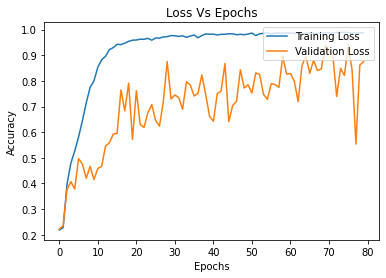

In [19]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Loss Vs Epochs")
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
plt.show()

## As i have set the checkpoint to save the best weights only, so model saved the weights with maximum val_acc, thus the model is weights having 94% on validation set.